In [351]:
import pandas as pd

df = pd.read_csv("T_F41SCHEDULE_B43.csv")
df.head(100)

/var/folders/vz/sz_zpsp925g47k7jh62mz3ch0000gp/T/ipykernel_24621/3063031635.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("T_F41SCHEDULE_B43.csv")


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006,5X,United Parcel Service,1967.0,United Parcel Service,19302,N937UP,O,N,0.0,BOEING,NaN,B727-100,43500.0,3/1/1994 12:00:00 AM,19917.0,5X
96,2006,5X,United Parcel Service,1967.0,United Parcel Service,19314,N906UP,O,N,0.0,BOEING,NaN,B727-100,43500.0,3/8/1993 12:00:00 AM,19917.0,5X
97,2006,5X,United Parcel Service,1967.0,United Parcel Service,19503,N936UP,O,Y,0.0,BOEING,NaN,B727-100,43500.0,10/10/1989 12:00:00 AM,19917.0,5X
98,2006,5X,United Parcel Service,1967.0,United Parcel Service,19506,N938UP,O,Y,0.0,BOEING,NaN,B727-100,43500.0,3/1/1994 12:00:00 AM,19917.0,5X


Question 1

In [352]:
miss_carrier = df["CARRIER"].isna()
miss_carrier_name = df["CARRIER_NAME"].isna()
print(df.loc[miss_carrier])

       YEAR CARRIER             CARRIER_NAME  MANUFACTURE_YEAR  \
11776  2007     NaN  North American Airlines            1993.0   
11777  2007     NaN  North American Airlines            1995.0   
11778  2007     NaN  North American Airlines            1996.0   
11779  2007     NaN  North American Airlines            1996.0   
11780  2007     NaN  North American Airlines            1997.0   
11781  2007     NaN  North American Airlines            2000.0   
11782  2007     NaN  North American Airlines            2001.0   
11783  2007     NaN  North American Airlines            2001.0   
11784  2007     NaN  North American Airlines            2002.0   
11785  2007     NaN  North American Airlines            2002.0   
19009  2008     NaN  North American Airlines            1993.0   
19010  2008     NaN  North American Airlines            1995.0   
19011  2008     NaN  North American Airlines            1996.0   
19012  2008     NaN  North American Airlines            1996.0   
19013  200

It seems like only North American Airlines has missing "CARRIER" field. By searching online, we know that it has an CARRIER code of "NA". Hence, constant imputation is good here. One conjecture is that, the "NA" code was mixed with the na type and hence the codes are shown as missing.

In [353]:
df.loc[df["CARRIER"].isna(), "CARRIER"] = "NA"
print(df.loc[miss_carrier])

       YEAR CARRIER             CARRIER_NAME  MANUFACTURE_YEAR  \
11776  2007      NA  North American Airlines            1993.0   
11777  2007      NA  North American Airlines            1995.0   
11778  2007      NA  North American Airlines            1996.0   
11779  2007      NA  North American Airlines            1996.0   
11780  2007      NA  North American Airlines            1997.0   
11781  2007      NA  North American Airlines            2000.0   
11782  2007      NA  North American Airlines            2001.0   
11783  2007      NA  North American Airlines            2001.0   
11784  2007      NA  North American Airlines            2002.0   
11785  2007      NA  North American Airlines            2002.0   
19009  2008      NA  North American Airlines            1993.0   
19010  2008      NA  North American Airlines            1995.0   
19011  2008      NA  North American Airlines            1996.0   
19012  2008      NA  North American Airlines            1996.0   
19013  200

In [354]:
print(df.loc[miss_carrier_name, ["CARRIER", "UNIQUE_CARRIER"]].drop_duplicates())

      CARRIER UNIQUE_CARRIER
11465      L4            NaN
54610      OH            NaN


It turns out that only CARRIER L4 and OH have missing CARRIER_NAME. Now search if any other records in the data match

In [355]:
print(df.loc[df["CARRIER"] == "L4", "CARRIER_NAME"].drop_duplicates())

11465                                      NaN
18739    Lynx Aviation d/b/a Frontier Airlines
Name: CARRIER_NAME, dtype: object


In [356]:
print(df.loc[df["CARRIER"] == "OH", "CARRIER_NAME"].drop_duplicates())

4896           Comair Inc.
54610                  NaN
68915    PSA Airlines Inc.
Name: CARRIER_NAME, dtype: object


We see all L4 code belongs to "Lynx Aviation d/b/a Frontier Airlines" so we can impute. However, two carriers share the code "OH". As explained by the BTS data attributes page, this is possible. Hence we cannot decide what to fill and should leave blank.


In [357]:
df.loc[df["CARRIER"] == "L4", "CARRIER_NAME"] = "Lynx Aviation d/b/a Frontier Airlines"

Since AIRLINE_ID and CARRIER/CARRIER_NAME should have a one to one mapping, we process in a similar way.

In [358]:
miss_id = df["AIRLINE_ID"].isna()
print(df.loc[miss_id, ["CARRIER", "CARRIER_NAME"]].drop_duplicates())

      CARRIER                           CARRIER_NAME
11465      L4  Lynx Aviation d/b/a Frontier Airlines
54610      OH                                    NaN


In [359]:
print(df.loc[df["CARRIER"] == "L4", "AIRLINE_ID"].drop_duplicates())

11465        NaN
18739    21217.0
Name: AIRLINE_ID, dtype: float64


In [360]:
df.loc[df["CARRIER"] == "L4", "AIRLINE_ID"] = 21217

Now we try to impute MANUFACTURE_YEAR, NUMBER_OF_SEATS, and CAPACITY_IN_POUNDS. It is very reasonable for the latter two to be same or very similar for every aircraft of the same model. Hence, we can use mean imputation after group by MODEL. Since each model could produce in a moderate time span, this might not be the perfect strategy for MANUFACTURE_YEAR but there is no better estimators available. Hence, we also apply the mean imputation to that.

GEN AI USE: ChatGPT-o4
"I want to impute MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS with the model mean. i.e., calculate the mean of each values for the same MODEL."

In an initial version, after examining some filled data, I observed that in some cases "0" is filled. This is probably because such model never appear elsewhere in the dataset. In this case, we rather give up imputation.

"For rows that we intend to impute, if we cannot find the corresponding model elsewhere in the dataset, we will not impute."


In [361]:
cols = ["MANUFACTURE_YEAR","NUMBER_OF_SEATS","CAPACITY_IN_POUNDS"]

for col in cols:
    model_means = df.groupby("MODEL")[col].mean()

    impute_mask = (
        df["MODEL"].notna() &
        df[col].isna() &
        df["MODEL"].map(model_means).notna()
    )

    df.loc[impute_mask, col] = df.loc[impute_mask, "MODEL"].map(model_means)

In [362]:
print(df.loc[impute_mask, cols].head(50))

       MANUFACTURE_YEAR  NUMBER_OF_SEATS  CAPACITY_IN_POUNDS
78991            1982.0            181.0       173639.862069
79015            2012.0              0.0       237756.000000
79016            2012.0              0.0       237756.000000
81902            1971.0              0.0       137895.511182
81903            1971.0              0.0       137895.511182
81904            1972.0              0.0       137895.511182
81905            1972.0              0.0       137895.511182
81906            1972.0              0.0       137895.511182
81907            1972.0              0.0       137895.511182
81908            1973.0              0.0       137895.511182
81909            1973.0              0.0       137895.511182
81910            1973.0              0.0       167529.276596
81911            1973.0              0.0       137895.511182
81912            1974.0              0.0       137895.511182
81913            1974.0              0.0       137895.511182
81914            1974.0 

It is strange that there are still 0's for the NUMBER_OF_SEATS.

In [363]:
df.iloc[79015]

YEAR                                    2017
CARRIER                                   5Y
CARRIER_NAME                  Atlas Air Inc.
MANUFACTURE_YEAR                      2012.0
UNIQUE_CARRIER_NAME           Atlas Air Inc.
SERIAL_NUMBER                          37809
TAIL_NUMBER                           N643GT
AIRCRAFT_STATUS                            b
OPERATING_STATUS                           Y
NUMBER_OF_SEATS                          0.0
MANUFACTURER                          BOEING
AIRCRAFT_TYPE                           6262
MODEL                               B767-300
CAPACITY_IN_POUNDS                  237756.0
ACQUISITION_DATE       1/17/2013 12:00:00 AM
AIRLINE_ID                           20007.0
UNIQUE_CARRIER                            5Y
Name: 79015, dtype: object

In [364]:
df[df["MODEL"] == "B767-300"]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
36692,2011,5Y,Atlas Air Inc.,1990.0,Atlas Air Inc.,25221,N640MC,O,Y,0.0,BOEING,6261,B767-300,237756.0,3/9/1997 12:00:00 AM,20007.0,5Y
36694,2011,5Y,Atlas Air Inc.,1992.0,Atlas Air Inc.,25132,N641MC,O,Y,0.0,BOEING,6261,B767-300,237756.0,3/9/1997 12:00:00 AM,20007.0,5Y
71855,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/17/2013 12:00:00 AM,20007.0,5Y
71856,2016,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/22/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/22/2013 12:00:00 AM,20007.0,5Y
98561,2019,PO,Polar Air Cargo Airways,2013.0,Polar Air Cargo Airways,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,1/23/2013 12:00:00 AM,20100.0,PO
98565,2019,PO,Polar Air Cargo Airways,2014.0,Polar Air Cargo Airways,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,7/17/2014 12:00:00 AM,20100.0,PO
98566,2019,PO,Polar Air Cargo Airways,2015.0,Polar Air Cargo Airways,27611,N647GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,12/12/2015 12:00:00 AM,20100.0,PO
98567,2019,PO,Polar Air Cargo Airways,2016.0,Polar Air Cargo Airways,26207,N642GT,b,Y,0.0,BOEING,6262,B767-300,237756.0,2/25/2016 12:00:00 AM,20100.0,PO


It turns out that it is common to have 0 as a placeholder for those MODEL where NUMBER_OF_SEATS are unknown. Hence we will leave it as that.

Question 2

In [365]:
df.head(1000)

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2006,AA,American Airlines Inc.,1993.0,American Airlines Inc.,675,N80084,O,Y,267.0,AIRBUS,NaN,A300-6,77700.0,2/19/1993 12:00:00 AM,19805.0,AA
996,2006,AA,American Airlines Inc.,1994.0,American Airlines Inc.,26973,N693AA,O,Y,188.0,BOEING,NaN,B757-2,49500.0,1/7/1994 12:00:00 AM,19805.0,AA
997,2006,AA,American Airlines Inc.,1994.0,American Airlines Inc.,26974,N694AA,O,Y,188.0,BOEING,NaN,B757-2,49500.0,1/26/1994 12:00:00 AM,19805.0,AA
998,2006,AA,American Airlines Inc.,1994.0,American Airlines Inc.,26975,N695AN,O,Y,188.0,BOEING,NaN,B757-2,49500.0,6/13/1994 12:00:00 AM,19805.0,AA


In [366]:
manufacturer_frequency = df["MANUFACTURER"].value_counts(dropna=False)
manufacturer_frequency

MANUFACTURER
BOEING                                                                              15922
Embraer                                                                             11508
THEBOEINGCO                                                                          9223
Bombardier                                                                           8871
Boeing                                                                               8392
                                                                                    ...  
BEECHCRAFT                                                                              1
FOKKER71                                                                                1
FOKKER70                                                                                1
FOKKER72                                                                                1
MCDONNEL                                                                               

There are too many alias for companies and it is impossible to manually combine all of them. Hence, I only try to merge two of the largest manufacturers, Boeing and Airbus.

In [367]:
mask_boeing = df["MANUFACTURER"].str.contains("boeing", case=False, na=False)
mask_airbus = df["MANUFACTURER"].str.contains("airbus", case=False, na=False)

df.loc[mask_boeing, "MANUFACTURER"] = "Boeing"
df.loc[mask_airbus, "MANUFACTURER"] = "Airbus"

manufacturer_frequency = df["MANUFACTURER"].value_counts(dropna=False)
manufacturer_frequency

MANUFACTURER
Boeing                      55639
Airbus                      23517
Embraer                     11508
Bombardier                   8871
CESSNA                       4157
                            ...  
ISRAELAIRCRAFTINDUSTRIES        1
FOKKER72                        1
FOKKER70                        1
FOKKER71                        1
B757-223                        1
Name: count, Length: 162, dtype: int64

In [368]:
model_frequency = df["MODEL"].value_counts(dropna=False)
model_frequency

MODEL
EMB-145          2614
B-737-7H4        2470
B737-823         2370
A320-232         2333
A321-231         2259
                 ... 
B-777-212           1
B-777-2U8           1
B767-328            1
CHAL-601-3A         1
ERJ170-200STD       1
Name: count, Length: 1341, dtype: int64

This is extremely complicated that I cannot make sure what are the same model and what are not. As one example, I standardized all trailing "passenger/passengeronly" to "-PSGR".

GEN AI USE: ChatGPT-o4
"For all model names, I want to change all trailing "passenger"/"passengeronly" (case insensitive) to "-PSGR". Provide a regex pattern."

In [369]:
df["MODEL"] = df["MODEL"].str.replace(
    r'(?i)[\s\-]*(passengeronly|passenger)\s*$',
    "-PSGR",
    regex=True
)

model_frequency = df["MODEL"].value_counts(dropna=False)
model_frequency

MODEL
EMB-145          2614
B-737-7H4        2470
B737-823         2370
A320-232         2333
A321-231         2259
                 ... 
B-732-AF            1
B-777-FHT           1
Challenger601       1
A-320-112           1
ERJ170-200STD       1
Name: count, Length: 1335, dtype: int64

In [370]:
aircraft_status_frequency = df["AIRCRAFT_STATUS"].value_counts(dropna=False)
aircraft_status_frequency

AIRCRAFT_STATUS
O    79487
b    30852
B    12699
a     7804
A     1330
L      122
o       19
Name: count, dtype: int64

From BTS, we code should be capital A, B, O. We firstly update all letters to be capital - however, we also see there are 122 instances of code L. I chose to remain it despite it does not appear on the explanation page. The case for OPERATING_STATUS is similar.

In [371]:
df["AIRCRAFT_STATUS"] = df["AIRCRAFT_STATUS"].str.upper()

In [372]:
operating_status_frequency = df["OPERATING_STATUS"].value_counts(dropna=True)
operating_status_frequency

OPERATING_STATUS
Y    126577
N      5664
y        71
          1
Name: count, dtype: int64

In [373]:
df["OPERATING_STATUS"] = df["OPERATING_STATUS"].str.upper()
df = df[(df["OPERATING_STATUS"] == "Y") | (df["OPERATING_STATUS"] == "N")]

Question 3

Initial length is:

In [374]:
len(df)

132312

After dropping NaN, but not 0's:

In [375]:
df = df.dropna()
len(df)

101275

Question 4

In [376]:
seats_frequency = df["NUMBER_OF_SEATS"].value_counts(dropna=False)
seats_frequency

NUMBER_OF_SEATS
0.0      16901
50.0      9665
76.0      6061
143.0     5508
160.0     3578
         ...  
314.0        1
313.0        1
94.0         1
23.0         1
296.0        1
Name: count, Length: 233, dtype: int64

In [377]:
capacity_frequency = df["CAPACITY_IN_POUNDS"].value_counts(dropna=False)
capacity_frequency

CAPACITY_IN_POUNDS
36200.0     5421
3500.0      3376
40800.0     3238
0.0         2269
53000.0     2047
            ... 
138289.0       1
205363.0       1
122078.0       1
42721.0        1
37605.0        1
Name: count, Length: 1744, dtype: int64

As mentioned at the end of Question 1, both columns have a considerable number of 0 (which does not make sense), possibly as placeholders. In essence they can be treated as missing entries. To make the analysis of this question meaningful, we drop these rows as well.

In [378]:
df = df[(df["CAPACITY_IN_POUNDS"] != 0) & (df["NUMBER_OF_SEATS"]!= 0)]
len(df)

82301

Since the procedure for two columns are identical, we process them together.

Current column: NUMBER_OF_SEATS
Raw skewness: 0.7795668816674661


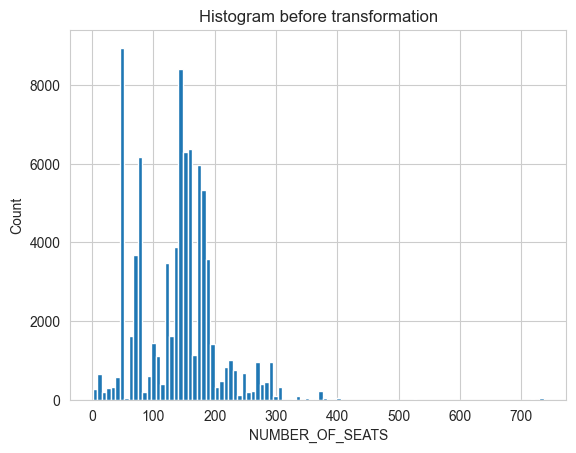

New skewness: 0.009972852321790179


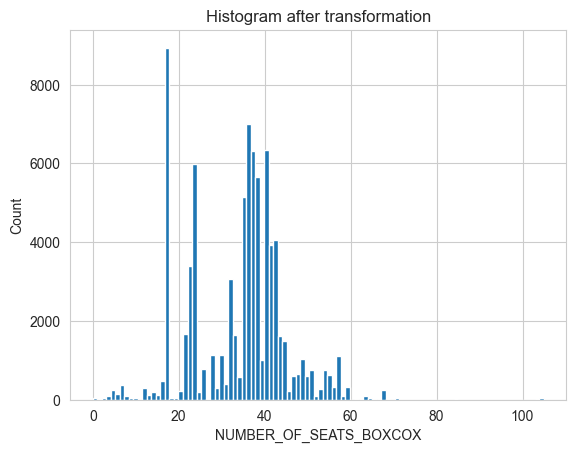

Current column: CAPACITY_IN_POUNDS
Raw skewness: 4.182874310374644


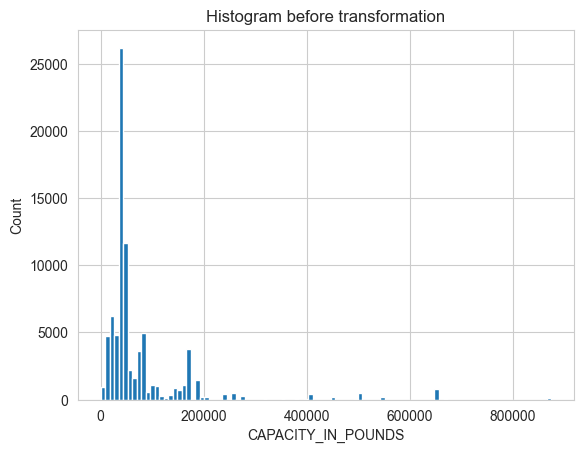

New skewness: 0.06602430469770965


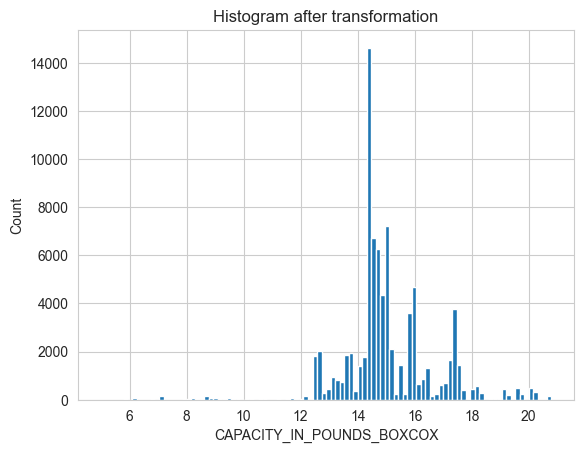

In [379]:
import matplotlib.pyplot as plt
from scipy.stats import boxcox

for col in ["NUMBER_OF_SEATS","CAPACITY_IN_POUNDS"]:
    print(f"Current column: {col}")
    data = df[col]
    raw_skew = data.skew()
    print(f"Raw skewness: {raw_skew}")

    plt.figure()
    plt.hist(data, bins=100)
    plt.title("Histogram before transformation")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    transformed, lam = boxcox(data)
    df[f"{col}_BOXCOX"] = transformed

    new_skew = pd.Series(transformed).skew()
    print(f"New skewness: {new_skew}")

    plt.figure()
    plt.hist(transformed, bins=100)
    plt.title("Histogram after transformation")
    plt.xlabel(f"{col}_BOXCOX")
    plt.ylabel("Count")
    plt.show()

We see that both seats and capacity were initially right skewed where capacity has a very high skewness. Skewness for both columns drop significantly after the boxcox transformation. However, They are far away from a perfect bell shape as some seats and capacity counts cluster at some certain number - for example, around 45-50 for seats before transformation - which makes sense as certain model might have a fixed number of seats/pounds of capacity. These traits will preserve even after the transformation.

Question 5

GEN AI USE: ChatGPT-o4
"What is the best way to create a new column SIZE for my df depending on quantile of NUMBER_OF_SEATS where each quantile is named "SMALL","MEDIUM","LARGE","XLARGE"?"

In [380]:
size_labels = ["SMALL","MEDIUM","LARGE","XLARGE"]
df["SIZE"] = pd.qcut(df["NUMBER_OF_SEATS"], q=4, labels=size_labels)

/var/folders/vz/sz_zpsp925g47k7jh62mz3ch0000gp/T/ipykernel_24621/3280984283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_count = df.groupby(["SIZE", col]).size().unstack(fill_value=0)


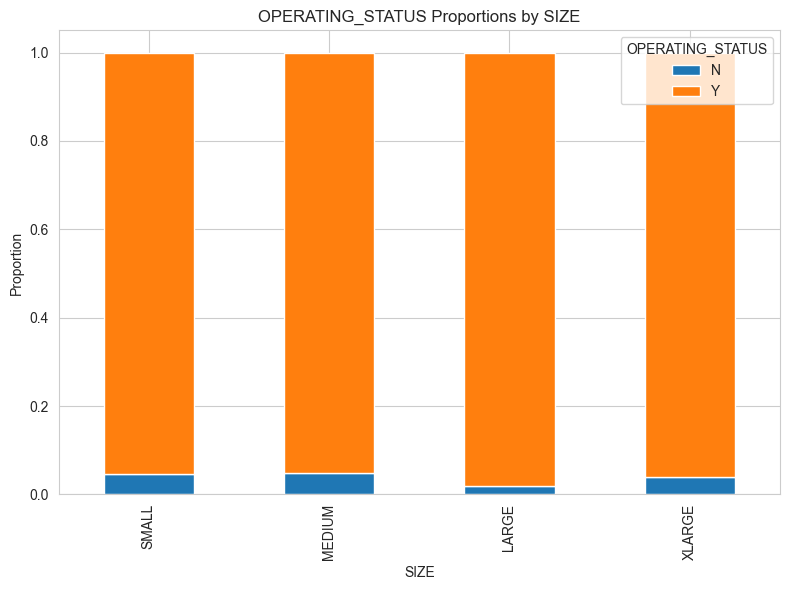

/var/folders/vz/sz_zpsp925g47k7jh62mz3ch0000gp/T/ipykernel_24621/3280984283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_count = df.groupby(["SIZE", col]).size().unstack(fill_value=0)


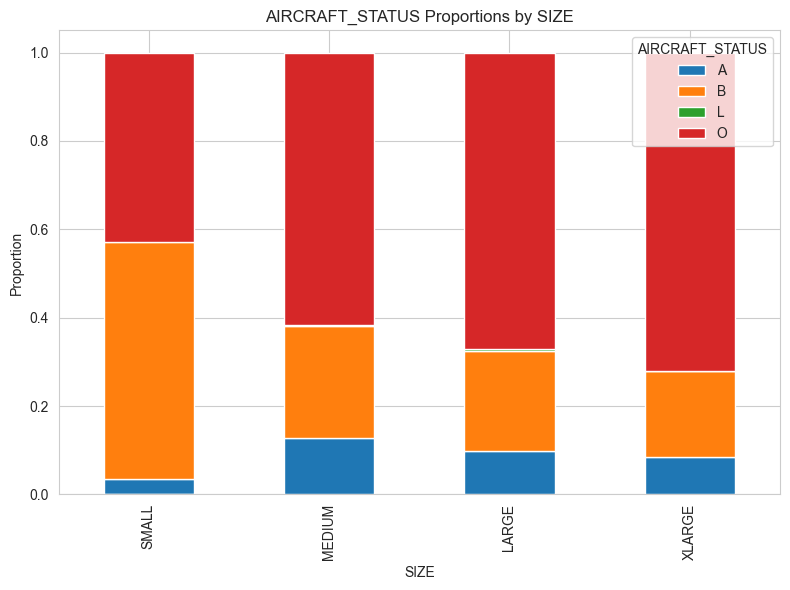

In [381]:
for col in ["OPERATING_STATUS", "AIRCRAFT_STATUS"]:
    size_count = df.groupby(["SIZE", col]).size().unstack(fill_value=0)
    prop = (size_count.apply(lambda row: row / row.sum(), axis=1))

    prop.plot(
        kind="bar",
        stacked=True,
        figsize=(8, 6),
        title=f"{col} Proportions by SIZE"
    )
    plt.ylabel("Proportion")
    plt.xlabel("SIZE")
    plt.legend(title=col)
    plt.tight_layout()
    plt.show()

For OPERATING_STATUS, all sizes have much more Y(Yes) than N(No). We see that LARGE and XLARGE have slightly more Y than the other two sizes (proportionally).

For AIRCRAFT_STATUS, the most significant trend is that larger sizes have more proportion of O(Owned). That is, larger aircraft are more likely to be owned than leased.

GEN AI Disclosure have been included in the notebook where GEN AI was used.